110.0
110.0


<IPython.core.display.Javascript object>


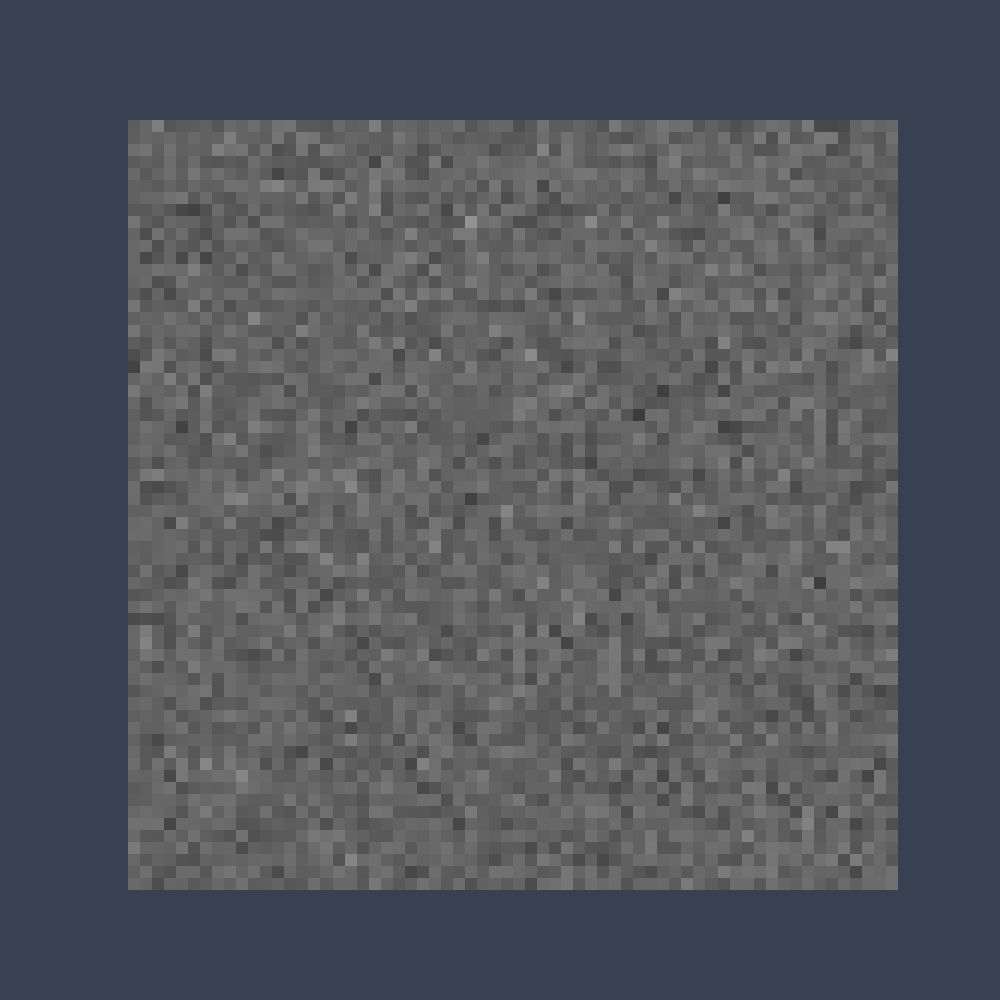

<IPython.core.display.Javascript object>


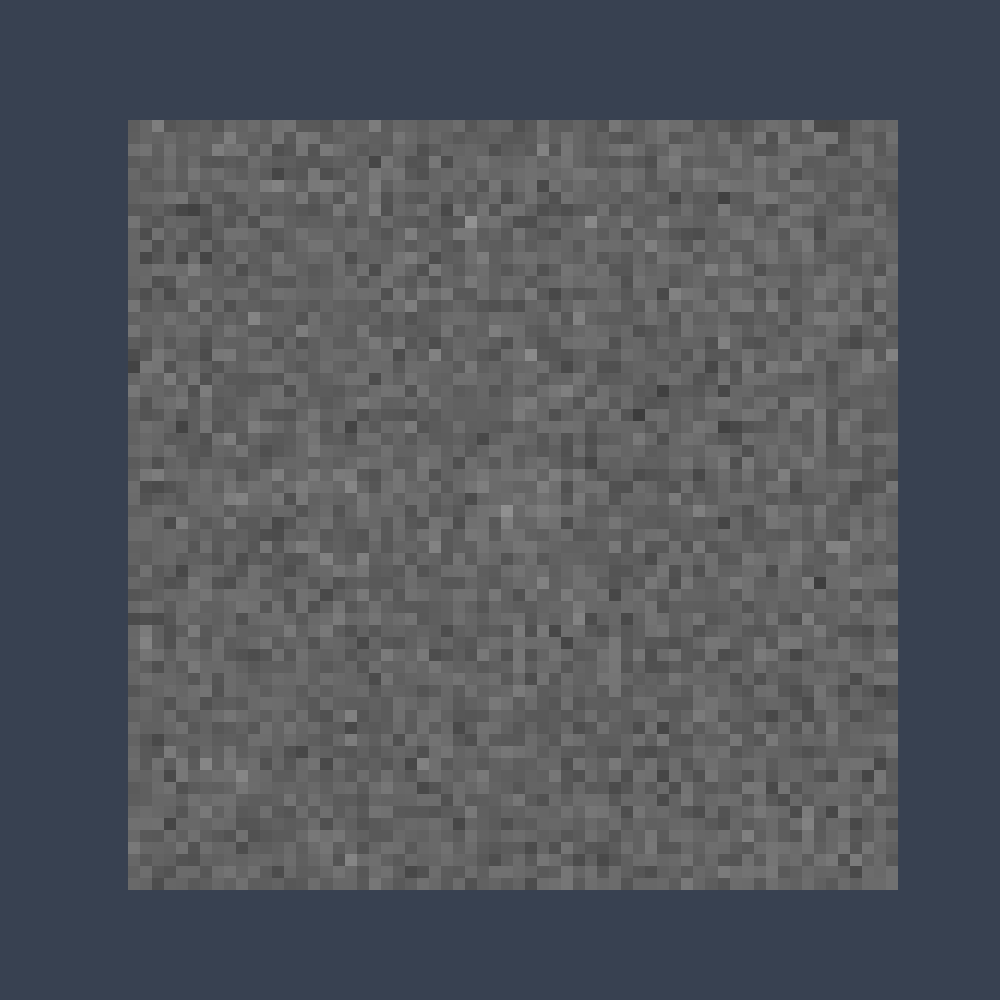

In [1]:
%matplotlib notebook

from jupyterthemes import jtplot
import matplotlib.pyplot as plt
import scipy.ndimage as snd
import numpy as np

# Set plot theme
jtplot.style()

# Settings
signal_intensity = 10 # set signal intensity
background_intensity = 100  # set background intensity
var_noise = 125 # set var noise
gaussian_sigma = 0.5 # set sd of gaussian kernel
num_images = 1000 # number of images to create
image_size = 64
obj_dim1 = [28,36]
obj_dim2 = [29,35]

# Create list to store noise images
noise = []

# Create noise images
for n in range(num_images):
    # Create measurement noise
    noise.append(np.random.normal(0,var_noise**(0.5),(image_size,image_size)))

# Create background image
background = np.ones((image_size,image_size))*background_intensity
background_gauss = snd.filters.gaussian_filter(background,gaussian_sigma)

# Create signal image
signal = np.zeros((image_size,image_size))
signal[obj_dim1[0]:obj_dim1[1],obj_dim2[0]:obj_dim2[1]] = signal_intensity
signal[obj_dim2[0]:obj_dim2[1],obj_dim1[0]:obj_dim1[1]] = signal_intensity
print(np.max(signal+background))
signal_gauss = snd.filters.gaussian_filter(signal+background,gaussian_sigma)
print(np.max(signal_gauss))

# Combine background and signal
signal_absent = [background_gauss+nse for nse in noise]

# Combine signal + background + noise
signal_present = [signal_gauss+nse for nse in noise]

# Display Images (from 1st sample)

# signal absent image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_absent[0],cmap='gray',vmin=0,vmax=255)

# signal present image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(signal_present[0],cmap='gray',vmin=0,vmax=255)
plt.show()

# plot images
plt.show()

<IPython.core.display.Javascript object>


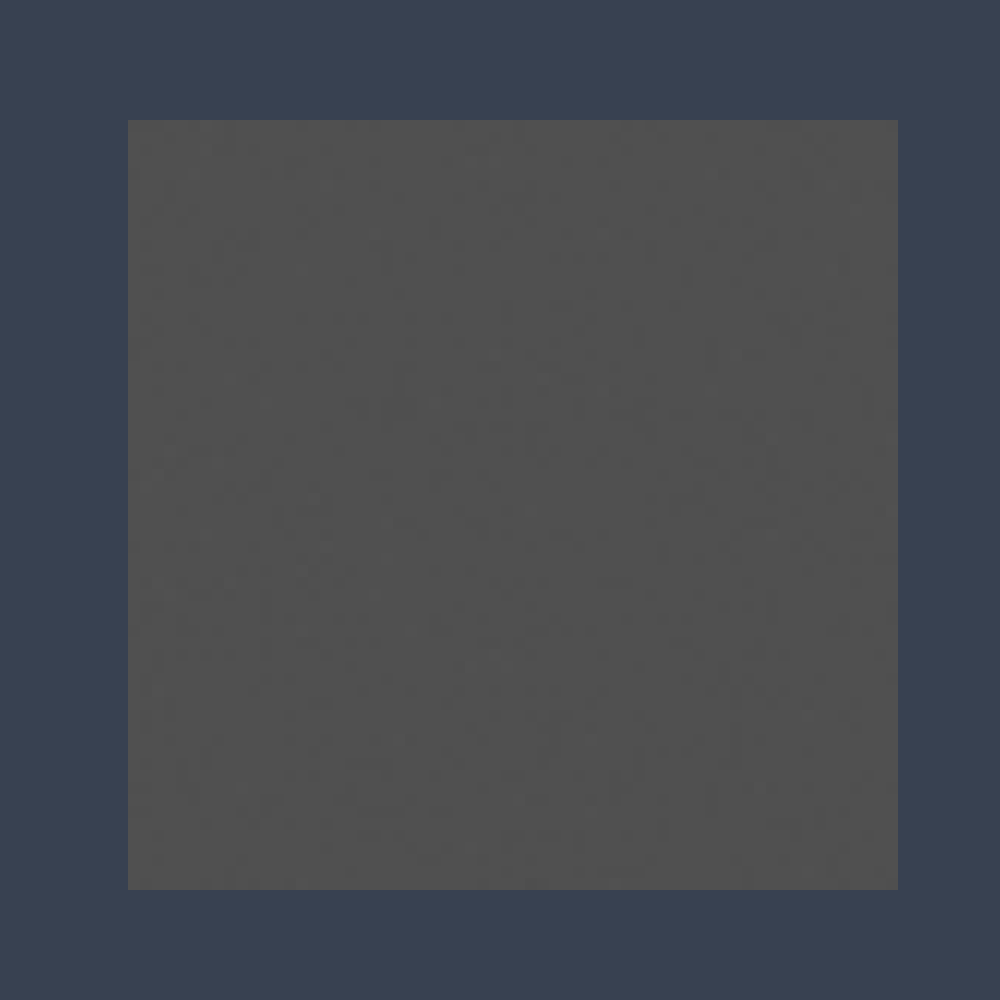

<IPython.core.display.Javascript object>


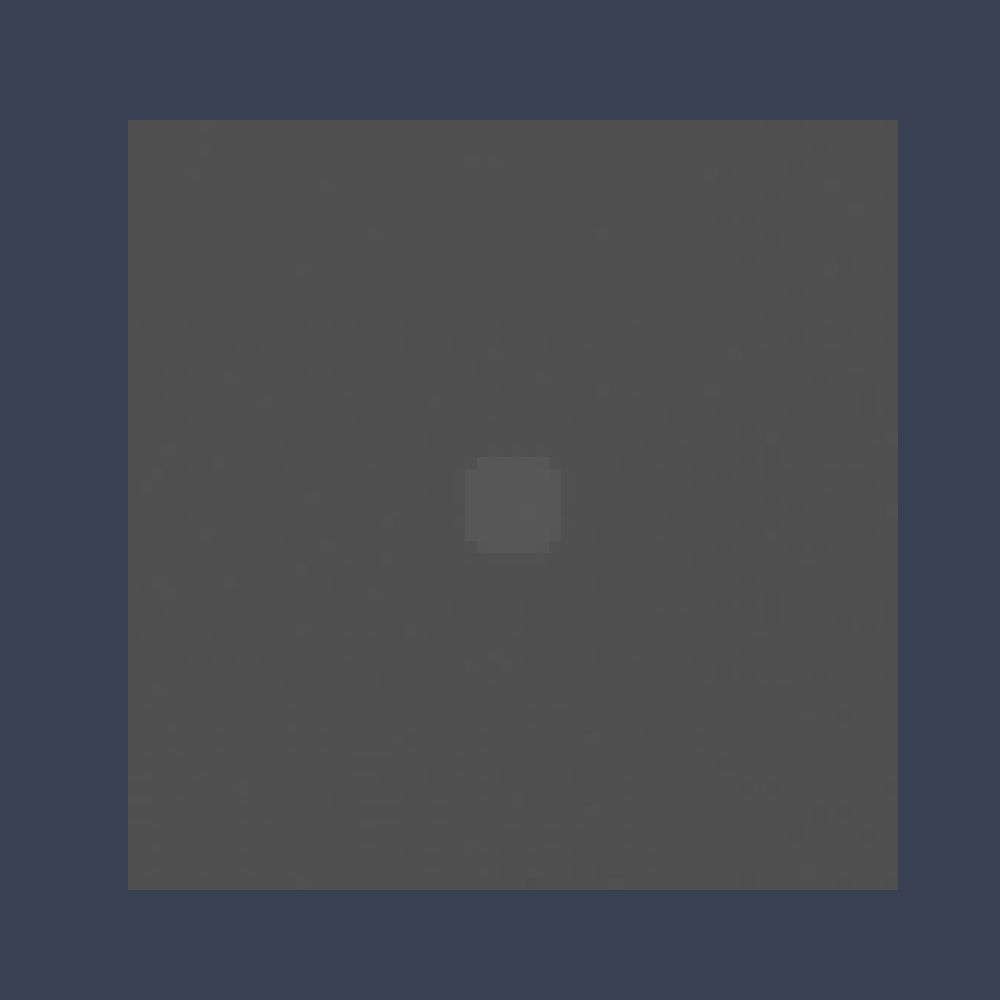

In [2]:
from functools import reduce

# split train/val set
train_signal_absent = signal_absent[0:800]
train_signal_present = signal_present[0:800]
val_signal_absent = signal_absent[800:1000]
val_signal_present = signal_present[800:1000]

# Generate average images for signal present/signal absent
avg_signal_absent = reduce(lambda x,y:x+y, train_signal_absent)/num_images
avg_signal_present = reduce(lambda x,y:x+y, train_signal_present)/num_images

# avg noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_absent,cmap='gray',vmin=0,vmax=255)

# avg signal + noise image
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(avg_signal_present,cmap='gray',vmin=0,vmax=255)

# plot images
plt.show()

# flatten arrays
noise_array = np.transpose(np.vstack([n.flatten() for n in noise[0:800]]))
avg_signal_absent_array = avg_signal_absent.flatten()
avg_signal_present_array = avg_signal_present.flatten()
val_signal_absent = np.transpose(np.vstack([n.flatten() for n in val_signal_absent]))
val_signal_present = np.transpose(np.vstack([n.flatten() for n in val_signal_present]))

In [3]:
# combine validation images
data_array = np.hstack((val_signal_absent,val_signal_present))

# calculate covariance/inverse covariance matrix
covariance = np.cov(noise_array)
icov = np.linalg.inv(covariance)

# calculate diffence of avg 2 classes
avg_t = avg_signal_present_array-avg_signal_absent_array

# calculate test statistic
l_pw = np.matmul(np.matmul(avg_t,icov),data_array)

[5.024992502477868e+18, 4.676812497846121e+18, 4.4209511694279844e+18, 4.5395684620704164e+18, 5.102775396303079e+18, 4.5137037708691937e+18, 4.313508739145848e+18, 4.639009246272688e+18, 3.9686462149398124e+18, 4.803552329632512e+18, 4.3039212274929997e+18, 4.3680650541618673e+18, 4.5557386189751224e+18, 4.931961580241081e+18, 4.790110852961137e+18, 4.5874195478600827e+18, 4.6063580783897457e+18, 5.12903458140427e+18, 4.986318883770423e+18, 4.664155484171169e+18, 4.996592803882897e+18, 4.639041894646875e+18, 4.564465114930948e+18, 4.3689660397438484e+18, 4.5737347779445135e+18, 4.242633022466697e+18, 4.729503009075835e+18, 5.02664926392066e+18, 3.866528296753983e+18, 4.1546724021995766e+18, 4.689614777369956e+18, 4.797138481936387e+18, 4.307919410047962e+18, 4.789391681230662e+18, 4.890292438342908e+18, 4.980452074097797e+18, 4.901900766204512e+18, 4.5250790342392525e+18, 3.708884337757005e+18, 4.878011436203529e+18, 4.660680336477027e+18, 4.516415792649595e+18, 4.786756443283629e+18,

<IPython.core.display.Javascript object>


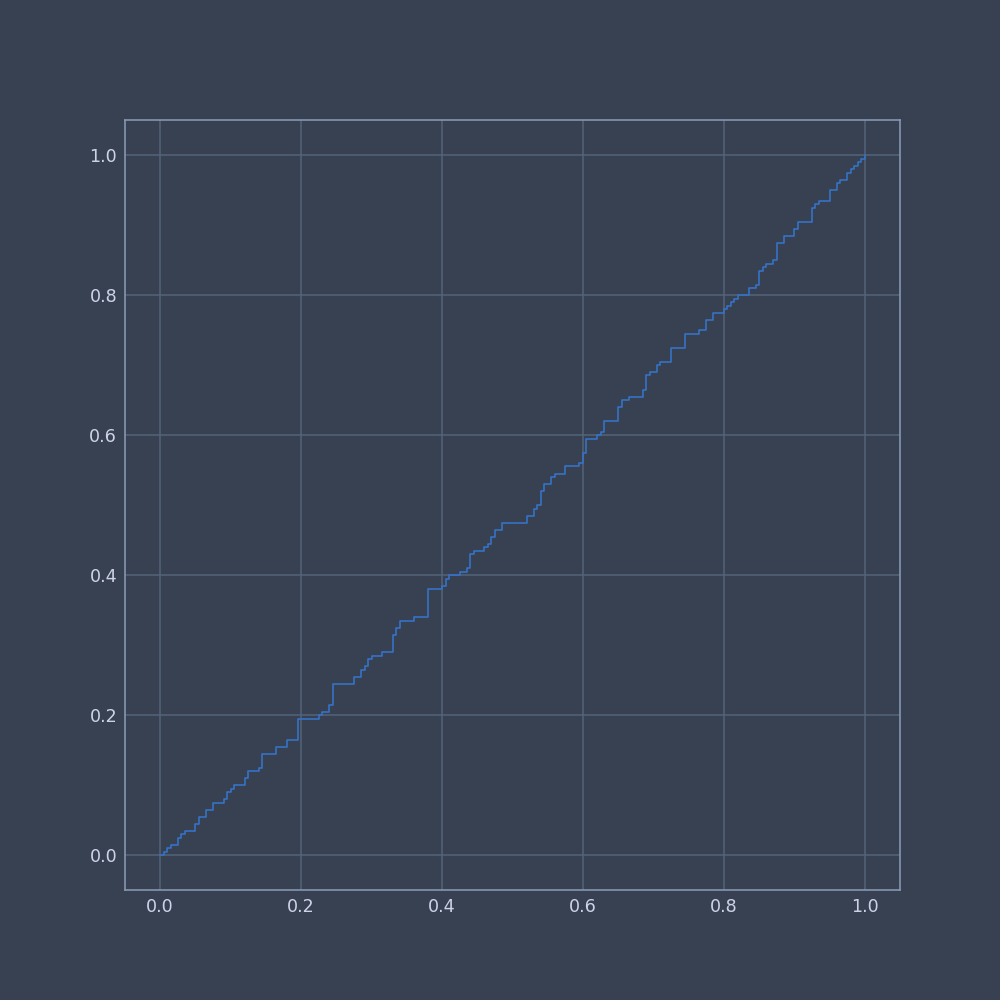

In [4]:
from sklearn.metrics import roc_auc_score,roc_curve

# print performance
print(list(l_pw))
img_cls = np.array([0]*200 + [1]*200)
[fpr,tpr,threshold] = roc_curve(img_cls,l_pw)
print("AUC: {}".format(roc_auc_score(img_cls,l_pw)))
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr)
plt.show()